# Exploring Dandiset 000563: Allen Institute Openscope - Barcoding

**⚠️ CAUTION: This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting code or results. ⚠️**

## Overview

This notebook explores [Dandiset 000563 (version 0.250311.2145)](https://dandiarchive.org/dandiset/000563/0.250311.2145), which contains data from the Allen Institute's OpenScope project on temporal barcoding. The dataset includes extracellular electrophysiology recordings from Neuropixels probes in mouse visual cortex, where neurons are exposed to white noise flicker visual stimuli.

The key feature of this dataset is that when white noise visual stimuli are presented repeatedly, and neural responses are displayed as spike rasters, the patterns resemble UPC codes or barcodes. These "barcodes" may serve as identifiers of discrete cell types, as similar patterns have been observed across different animals and even species.

## In this notebook, we will:

1. Load the dataset and examine its basic metadata
2. Explore the structure of one of the NWB files
3. Analyze neural responses to the barcode stimuli
4. Visualize the "temporal barcodes" of neural activity
5. Assess how these barcodes vary across neurons

## Required Packages

This notebook requires the following packages:

- `dandi` - For accessing Dandisets from the DANDI archive
- `numpy` - For numerical operations
- `matplotlib` - For data visualization
- `pynwb` - For working with NWB files
- `h5py` - For working with HDF5 files
- `remfile` - For remote file access
- `seaborn` (optional) - For enhanced visualizations

## 1. Loading the Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pynwb
import h5py
import remfile
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Set up plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

Let's connect to the DANDI archive and retrieve information about our Dandiset:

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000563", "0.250311.2145")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description'][:500]}...")  # Truncating for readability

Dandiset name: Allen Institute Openscope - Barcoding
Dandiset URL: https://dandiarchive.org/dandiset/000563/0.250311.2145
Description: Some visual neurons have been shown to respond to white noise flicker visual stimuli with high temporal precision, particularly retinal ganglion cells and LGN relay cells. Responses to white noise stimulation are useful for a variety of analyses, including information theoretic measures and generative models of precise spike timing. However the literature was lacking data on responses to white noise in cortical visual areas, or in the visual stream flowing through the superior colliculus.

This ...


Now let's list some of the assets in this Dandiset to understand its structure:

In [3]:
# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")


First 5 assets:
- sub-699241/sub-699241_ses-1318772854_probe-1_ecephys.nwb (ID: 55148cf3-9d15-4d05-a190-4a73e007e48d)
- sub-699241/sub-699241_ses-1318772854_probe-3_ecephys.nwb (ID: 1b6325a9-1fc2-4fed-999c-d7c3aeb7a7a1)
- sub-699241/sub-699241_ses-1318772854_probe-4_ecephys.nwb (ID: 6e4d0047-ca6b-4d29-b150-bc9e2c445646)
- sub-699241/sub-699241_ses-1318772854_probe-0_ecephys.nwb (ID: 54cef618-72de-4c69-b441-8bd5e26049c5)
- sub-699241/sub-699241_ses-1318772854_ogen.nwb (ID: c3bbf094-904e-43b7-83d5-be5a8bf3826f)


## 2. Exploring an NWB File

Let's load one of the NWB files to examine its structure. We'll focus on the NWB file that contains both stimulus information and neural recordings from one of the probes.

In [4]:
# Load a specific NWB file from the Dandiset
url = "https://api.dandiarchive.org/api/assets/96786f67-a6ac-44dc-ba58-61317082fff3/download/"
print(f"Loading NWB file from: {url}")

remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

Loading NWB file from: https://api.dandiarchive.org/api/assets/96786f67-a6ac-44dc-ba58-61317082fff3/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Let's examine some basic metadata about this NWB file:

In [5]:
# Print basic information about the NWB file
print(f"Session ID: {nwb.session_id}")
print(f"Session Description: {nwb.session_description}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Institution: {nwb.institution}")
print(f"Experiment: {nwb.stimulus_notes}")

Session ID: 1292234897
Session Description: Data and metadata for an Ecephys session
Session Start Time: 2023-08-23 00:00:00-07:00
Institution: Allen Institute
Experiment: OpenScopeTemporalBarcode


### Subject Information

In [6]:
# Print information about the subject
subject = nwb.subject
print(f"Subject ID: {subject.subject_id}")
print(f"Age: {subject.age} (reference: {subject.age__reference})")
print(f"Sex: {subject.sex}")
print(f"Species: {subject.species}")
print(f"Strain: {subject.strain}")
print(f"Genotype: {subject.genotype}")

Subject ID: 685263
Age: P95D (reference: birth)
Sex: M
Species: Mus musculus
Strain: Transgenic
Genotype: Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt


### Examining the Visual Stimulus Information

This dataset contains recordings of neural responses to white noise visual stimuli. Let's examine the stimulus presentation information:

In [7]:
# Print information about the stimuli
print("Stimulus presentations available:")
for interval_name in nwb.intervals:
    n_presentations = len(nwb.intervals[interval_name].start_time[:])
    print(f"- {interval_name}: {n_presentations} presentations")

Stimulus presentations available:
- RepeatFFF_presentations: 43200 presentations
- UniqueFFF_presentations: 14400 presentations
- invalid_times: 1 presentations
- receptive_field_block_presentations: 1920 presentations


- static_block_presentations: 345600 presentations


The Dandiset description mentions two types of visual stimuli:
1. Full Field Flicker (FFF) - a spatially uniform field whose luminance was modulated in time
2. Static Gratings - a standing sinusoidal grating whose contrast was modulated in time

Let's examine the "RepeatFFF" stimulus, which is the repeated full-field flicker white noise that should produce the "barcode" patterns:

In [8]:
# Get information about the RepeatFFF stimulus presentations
repeat_fff = nwb.intervals['RepeatFFF_presentations']
print(f"Number of RepeatFFF presentations: {len(repeat_fff.start_time[:])}")
print(f"Available columns for each presentation: {repeat_fff.colnames}")

# Let's look at the first few presentations
for i in range(5):
    print(f"\nPresentation {i}:")
    print(f"  Start time: {repeat_fff.start_time[i]:.4f}s")
    print(f"  Stop time: {repeat_fff.stop_time[i]:.4f}s")
    print(f"  Duration: {repeat_fff.stop_time[i] - repeat_fff.start_time[i]:.4f}s")
    print(f"  Stimulus name: {repeat_fff.stimulus_name[i]}")
    print(f"  Contrast: {repeat_fff.contrast[i]}")

Number of RepeatFFF presentations: 43200
Available columns for each presentation: ('start_time', 'stop_time', 'stimulus_name', 'stimulus_block', 'index_repeat', 'contrast', 'mask', 'opacity', 'orientation', 'phase', 'spatial_frequency', 'size', 'units', 'stimulus_index', 'color', 'tags', 'timeseries')

Presentation 0:
  Start time: 162.1481s
  Stop time: 162.1648s
  Duration: 0.0167s
  Stimulus name: RepeatFFF
  Contrast: 1.0

Presentation 1:
  Start time: 162.1648s
  Stop time: 162.1815s
  Duration: 0.0167s
  Stimulus name: RepeatFFF
  Contrast: 1.0

Presentation 2:
  Start time: 162.1815s
  Stop time: 162.1982s
  Duration: 0.0167s
  Stimulus name: RepeatFFF
  Contrast: 1.0

Presentation 3:
  Start time: 162.1982s
  Stop time: 162.2149s
  Duration: 0.0167s
  Stimulus name: RepeatFFF
  Contrast: 1.0

Presentation 4:
  Start time: 162.2149s
  Stop time: 162.2315s
  Duration: 0.0166s
  Stimulus name: RepeatFFF
  Contrast: 1.0


## 3. Neural Response Data: The "Barcodes"

The core feature of this Dandiset is the neural responses to repeated white noise stimuli, which form "barcode" patterns. Let's examine the neural spike data to visualize these patterns.

In [9]:
# Get basic information about the units (neurons)
print(f"Number of units (neurons): {len(nwb.units.id[:])}")

# Look at available properties for each unit
print(f"\nUnit properties available: {nwb.units.colnames}")

# Print information about a few units
print("\nSample units:")
for unit_id in range(5):
    spike_times = nwb.units.spike_times_index[unit_id]
    print(f"Unit {unit_id}: {len(spike_times)} spikes, firing rate: {nwb.units.firing_rate[unit_id]:.2f} Hz")

Number of units (neurons): 2791

Unit properties available: ('local_index', 'waveform_halfwidth', 'quality', 'nn_miss_rate', 'amplitude', 'amplitude_cutoff', 'velocity_below', 'peak_channel_id', 'spread', 'snr', 'presence_ratio', 'cluster_id', 'waveform_duration', 'silhouette_score', 'recovery_slope', 'nn_hit_rate', 'max_drift', 'd_prime', 'firing_rate', 'isi_violations', 'isolation_distance', 'l_ratio', 'cumulative_drift', 'velocity_above', 'PT_ratio', 'repolarization_slope', 'spike_times', 'spike_amplitudes', 'waveform_mean')

Sample units:


Unit 0: 24548 spikes, firing rate: 3.02 Hz
Unit 1: 7382 spikes, firing rate: 0.91 Hz
Unit 2: 1463 spikes, firing rate: 0.18 Hz
Unit 3: 122379 spikes, firing rate: 15.05 Hz


Unit 4: 342942 spikes, firing rate: 42.17 Hz


Now, let's select a neuron that has a good response to the visual stimuli and visualize its "barcode" pattern by creating a raster plot aligned to the RepeatFFF stimulus presentations:

In [10]:
# Function to find units with high firing rates
def find_responsive_units(nwb, min_firing_rate=5.0, max_units=10):
    """Find units with firing rates above threshold"""
    unit_ids = []
    firing_rates = []
    
    for i, rate in enumerate(nwb.units.firing_rate[:]):
        if rate >= min_firing_rate:
            unit_ids.append(i)
            firing_rates.append(rate)
            if len(unit_ids) >= max_units:
                break
    
    return unit_ids, firing_rates

# Find responsive units
responsive_units, firing_rates = find_responsive_units(nwb)
print(f"Found {len(responsive_units)} units with high firing rates:")
for i, unit_id in enumerate(responsive_units):
    print(f"Unit {unit_id}: {firing_rates[i]:.2f} Hz")

Found 10 units with high firing rates:
Unit 3: 15.05 Hz
Unit 4: 42.17 Hz
Unit 9: 16.83 Hz
Unit 10: 25.14 Hz
Unit 11: 14.96 Hz
Unit 14: 34.36 Hz
Unit 17: 29.61 Hz
Unit 18: 22.86 Hz
Unit 20: 54.88 Hz
Unit 22: 45.22 Hz


In [11]:
# Select a responsive unit to analyze
unit_id = responsive_units[0]  # Select the first responsive unit
spike_times = nwb.units.spike_times_index[unit_id]

print(f"Analyzing Unit {unit_id}")
print(f"Number of spikes: {len(spike_times)}")
print(f"Time range: {min(spike_times):.1f}s to {max(spike_times):.1f}s")

Analyzing Unit 3
Number of spikes: 122379
Time range: 19.8s to 8151.5s


Now, let's visualize the "barcode" pattern for this neuron. We'll do this by aligning the spikes to each presentation of the RepeatFFF stimulus:

In [12]:
# Function to create a spike raster aligned to stimulus presentations
def create_spike_raster(spike_times, stim_starts, stim_stops, pre_time=0.1, post_time=0.5):
    """
    Create a raster plot of spikes aligned to stimulus presentations
    
    Parameters:
    -----------
    spike_times : array
        Array of spike times
    stim_starts : array
        Array of stimulus start times
    stim_stops : array
        Array of stimulus stop times
    pre_time : float
        Time before stimulus onset to include (seconds)
    post_time : float
        Time after stimulus offset to include (seconds)
        
    Returns:
    --------
    aligned_spikes : list of arrays
        List where each entry contains spike times relative to stimulus onset
    """
    aligned_spikes = []
    
    for i, (start, stop) in enumerate(zip(stim_starts, stim_stops)):
        # Find spikes that occur around this stimulus presentation
        trial_spikes = spike_times[(spike_times >= start - pre_time) & 
                                 (spike_times <= stop + post_time)]
        
        # Convert to time relative to stimulus onset
        relative_times = trial_spikes - start
        
        aligned_spikes.append(relative_times)
    
    return aligned_spikes

Let's focus on a subset of RepeatFFF presentations to visualize the barcode pattern:

In [13]:
# Get stimulus times for the first 100 RepeatFFF presentations
n_presentations = 100
stim_starts = repeat_fff.start_time[:n_presentations]
stim_stops = repeat_fff.stop_time[:n_presentations]

# Calculate mean stimulus duration
mean_duration = np.mean(stim_stops - stim_starts)
print(f"Mean stimulus duration: {mean_duration:.4f}s")

# Create the spike raster
aligned_spikes = create_spike_raster(spike_times, stim_starts, stim_stops)

Mean stimulus duration: 0.0167s


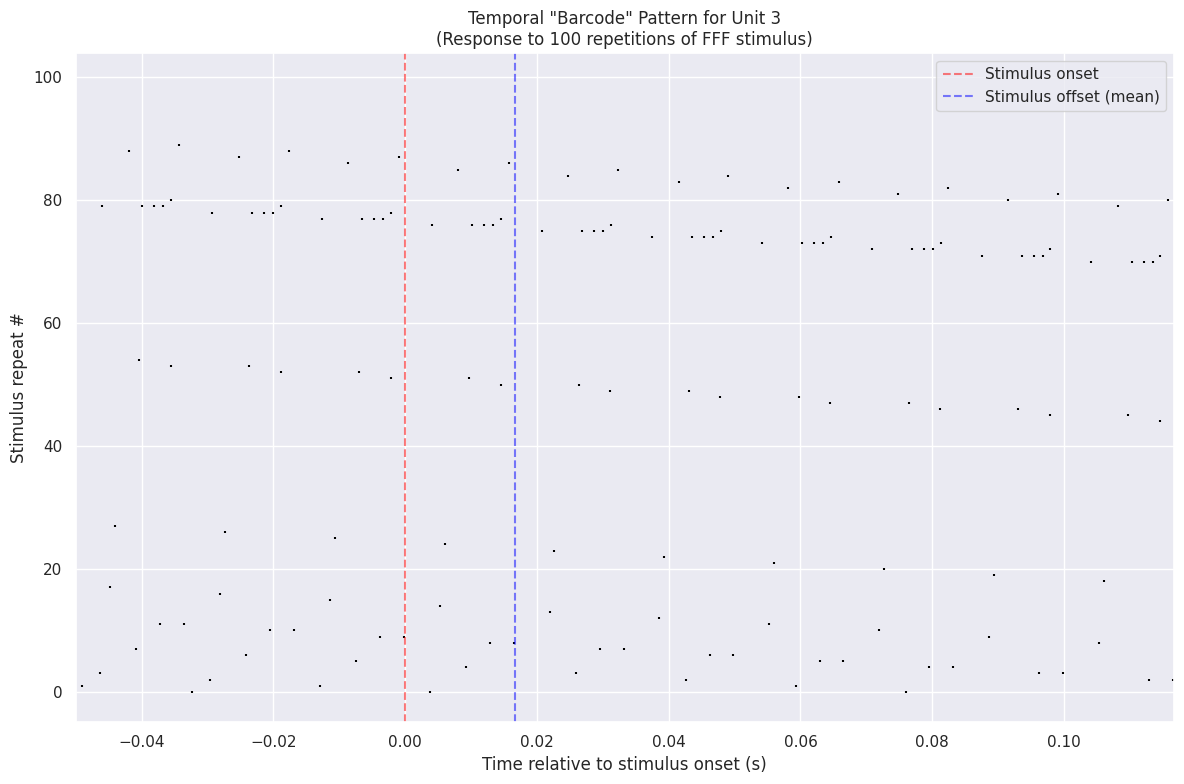

In [14]:
# Plot the raster
plt.figure(figsize=(12, 8))

# Plot spikes
for i, spikes in enumerate(aligned_spikes):
    plt.scatter(spikes, np.ones_like(spikes) * i, s=2, color='black', marker='|')

# Mark stimulus duration
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Stimulus onset')
plt.axvline(x=mean_duration, color='blue', linestyle='--', alpha=0.5, label='Stimulus offset (mean)')

# Set labels and title
plt.xlabel('Time relative to stimulus onset (s)')
plt.ylabel('Stimulus repeat #')
plt.title(f'Temporal "Barcode" Pattern for Unit {unit_id}\n(Response to {n_presentations} repetitions of FFF stimulus)')
plt.legend()
plt.xlim(-0.05, mean_duration + 0.1)

plt.tight_layout()
plt.show()

We can see the "barcode" pattern in the raster plot above. The vertical stripes represent consistent times when the neuron fires in response to the repeated stimulus.

Let's also look at the post-stimulus time histogram (PSTH) to better visualize the temporal response pattern:

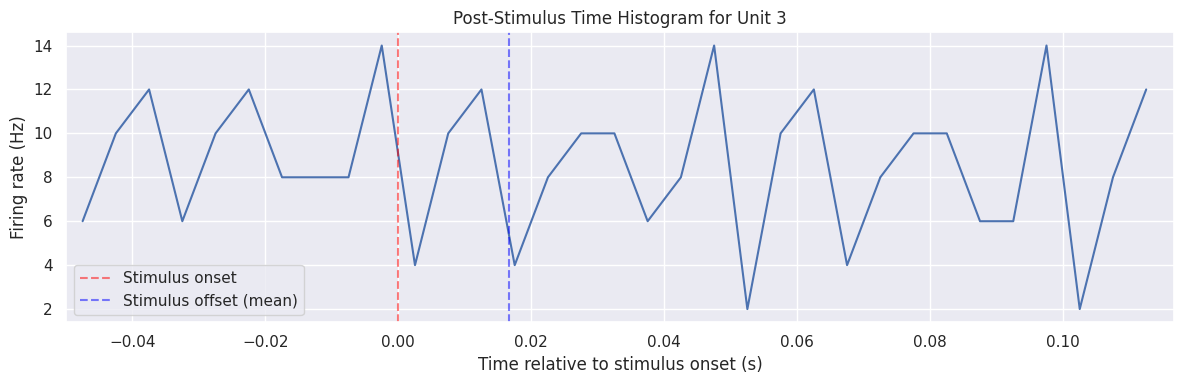

In [15]:
# Create PSTH for the unit
def create_psth(aligned_spikes, bin_size=0.005, t_start=-0.05, t_end=0.5):
    """Create post-stimulus time histogram"""
    # Create time bins
    bins = np.arange(t_start, t_end, bin_size)
    bin_centers = bins[:-1] + bin_size/2
    
    # Count spikes in each bin
    counts = np.zeros(len(bins) - 1)
    for spikes in aligned_spikes:
        hist, _ = np.histogram(spikes, bins=bins)
        counts += hist
    
    # Convert to firing rate in Hz
    firing_rate = counts / (bin_size * len(aligned_spikes))
    
    return bin_centers, firing_rate

# Calculate PSTH
bin_centers, firing_rate = create_psth(aligned_spikes, t_end=mean_duration + 0.1)

# Plot the PSTH
plt.figure(figsize=(12, 4))
plt.plot(bin_centers, firing_rate)
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Stimulus onset')
plt.axvline(x=mean_duration, color='blue', linestyle='--', alpha=0.5, label='Stimulus offset (mean)')

plt.xlabel('Time relative to stimulus onset (s)')
plt.ylabel('Firing rate (Hz)')
plt.title(f'Post-Stimulus Time Histogram for Unit {unit_id}')
plt.legend()
plt.xlim(-0.05, mean_duration + 0.1)

plt.tight_layout()
plt.show()

## 4. Comparing Barcodes Across Multiple Neurons

Now let's compare the "barcodes" from multiple neurons to see if they show similar or different patterns:

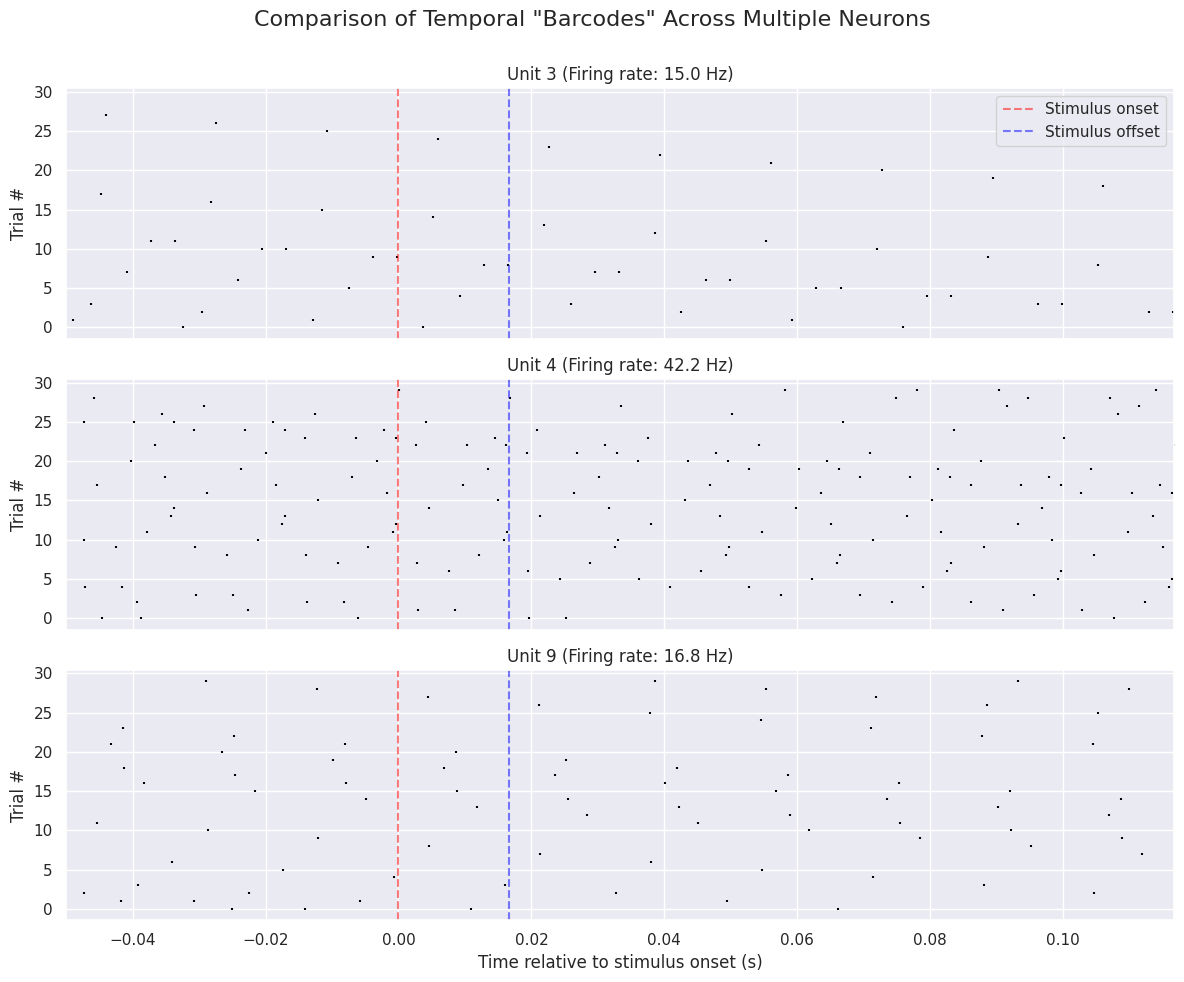

In [16]:
# Plot raster plots for several units
fig, axes = plt.subplots(len(responsive_units[:3]), 1, figsize=(12, 10), sharex=True)

for i, unit_id in enumerate(responsive_units[:3]):
    # Get spike times for this unit
    spike_times = nwb.units.spike_times_index[unit_id]
    
    # Create the spike raster for this unit
    aligned_spikes = create_spike_raster(spike_times, stim_starts, stim_stops)
    
    # Plot on the appropriate subplot
    ax = axes[i]
    for j, spikes in enumerate(aligned_spikes[:30]):  # Limit to 30 trials for clarity
        ax.scatter(spikes, np.ones_like(spikes) * j, s=2, color='black', marker='|')
    
    # Mark stimulus duration
    ax.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Stimulus onset' if i == 0 else "")
    ax.axvline(x=mean_duration, color='blue', linestyle='--', alpha=0.5, label='Stimulus offset' if i == 0 else "")
    
    # Set labels
    ax.set_ylabel(f'Trial #')
    ax.set_title(f'Unit {unit_id} (Firing rate: {nwb.units.firing_rate[unit_id]:.1f} Hz)')
    
    if i == 0:
        ax.legend(loc='upper right')

# Set common x-label
axes[-1].set_xlabel('Time relative to stimulus onset (s)')
plt.xlim(-0.05, mean_duration + 0.1)

plt.suptitle('Comparison of Temporal "Barcodes" Across Multiple Neurons', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Make room for the suptitle
plt.show()

## 5. Exploring Neuronal Responses to Unique vs. Repeated Stimuli

The Dandiset includes both "RepeatFFF" (repeated white noise) and "UniqueFFF" (unique white noise) stimuli. Let's compare the responses to both:

In [17]:
# Get information about the UniqueFFF stimulus presentations
unique_fff = nwb.intervals["UniqueFFF_presentations"]
print(f"Number of UniqueFFF presentations: {len(unique_fff.start_time[:])}")

# Get stimulus times for UniqueFFF
unique_starts = unique_fff.start_time[:100]  # First 100 presentations
unique_stops = unique_fff.stop_time[:100]

Number of UniqueFFF presentations: 14400


Now let's compare responses to repeated vs. unique stimuli for one neuron:

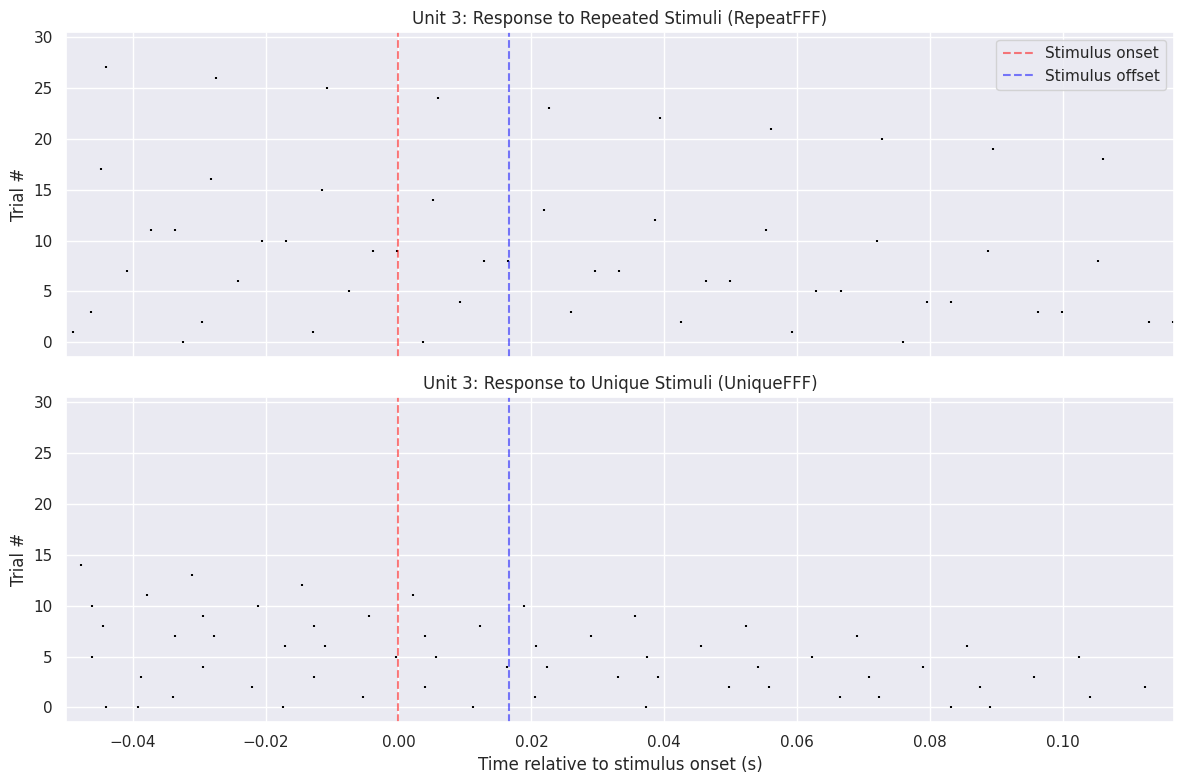

In [18]:
# Select a responsive unit to analyze
unit_id = responsive_units[0]
spike_times = nwb.units.spike_times_index[unit_id]

# Create spike rasters for repeated and unique stimuli
repeated_raster = create_spike_raster(spike_times, stim_starts[:30], stim_stops[:30])
unique_raster = create_spike_raster(spike_times, unique_starts[:30], unique_stops[:30])

# Plot comparison
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot repeated stimulus responses
for i, spikes in enumerate(repeated_raster):
    ax1.scatter(spikes, np.ones_like(spikes) * i, s=2, color='black', marker='|')
ax1.set_title(f'Unit {unit_id}: Response to Repeated Stimuli (RepeatFFF)')
ax1.set_ylabel('Trial #')
ax1.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Stimulus onset')
ax1.axvline(x=mean_duration, color='blue', linestyle='--', alpha=0.5, label='Stimulus offset')
ax1.legend()

# Plot unique stimulus responses
for i, spikes in enumerate(unique_raster):
    ax2.scatter(spikes, np.ones_like(spikes) * i, s=2, color='black', marker='|')
ax2.set_title(f'Unit {unit_id}: Response to Unique Stimuli (UniqueFFF)')
ax2.set_xlabel('Time relative to stimulus onset (s)')
ax2.set_ylabel('Trial #')
ax2.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Stimulus onset')
ax2.axvline(x=mean_duration, color='blue', linestyle='--', alpha=0.5, label='Stimulus offset')

plt.xlim(-0.05, mean_duration + 0.1)
plt.tight_layout()
plt.show()

We can see a clear difference between the responses to repeated vs unique stimuli. The "barcode" pattern is visible in the responses to repeated stimuli, showing consistent timing of spikes across trials. In contrast, the responses to unique stimuli do not show this pattern, as each stimulus is different.

## 6. Examining Correlations Between Neuron Responses

The Dandiset description suggests that similar barcode patterns might indicate similar cell types. Let's compute correlations between the responses of different neurons to the repeated stimuli:

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


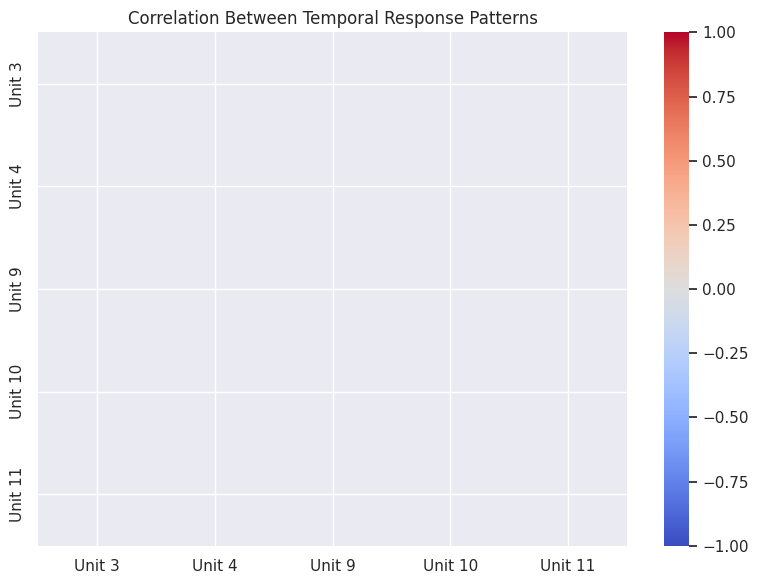

In [19]:
# Function to compute the PSTH for a unit
def compute_unit_psth(unit_id, stim_starts, stim_stops, bin_size=0.01, t_start=-0.05, t_end=0.5):
    """Compute PSTH for a given unit"""
    spike_times = nwb.units.spike_times_index[unit_id]
    aligned_spikes = create_spike_raster(spike_times, stim_starts, stim_stops)
    bin_centers, firing_rate = create_psth(aligned_spikes, bin_size=bin_size, 
                                          t_start=t_start, t_end=t_end)
    return bin_centers, firing_rate

# Compute PSTHs for all responsive units
bin_size = 0.01  # 10 ms bins
t_start = 0
t_end = mean_duration
psth_data = []

for unit_id in responsive_units[:5]:  # Limit to first 5 responsive units for clarity
    bin_centers, firing_rate = compute_unit_psth(unit_id, stim_starts, stim_stops, 
                                                bin_size, t_start, t_end)
    psth_data.append(firing_rate)

# Convert to numpy array for easier manipulation
psth_array = np.array(psth_data)

# Compute correlation matrix
corr_matrix = np.corrcoef(psth_array)

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
           xticklabels=[f'Unit {u}' for u in responsive_units[:5]],
           yticklabels=[f'Unit {u}' for u in responsive_units[:5]])
plt.title('Correlation Between Temporal Response Patterns')
plt.tight_layout()
plt.show()

Finally, let's visualize the response patterns (PSTHs) of these neurons together:

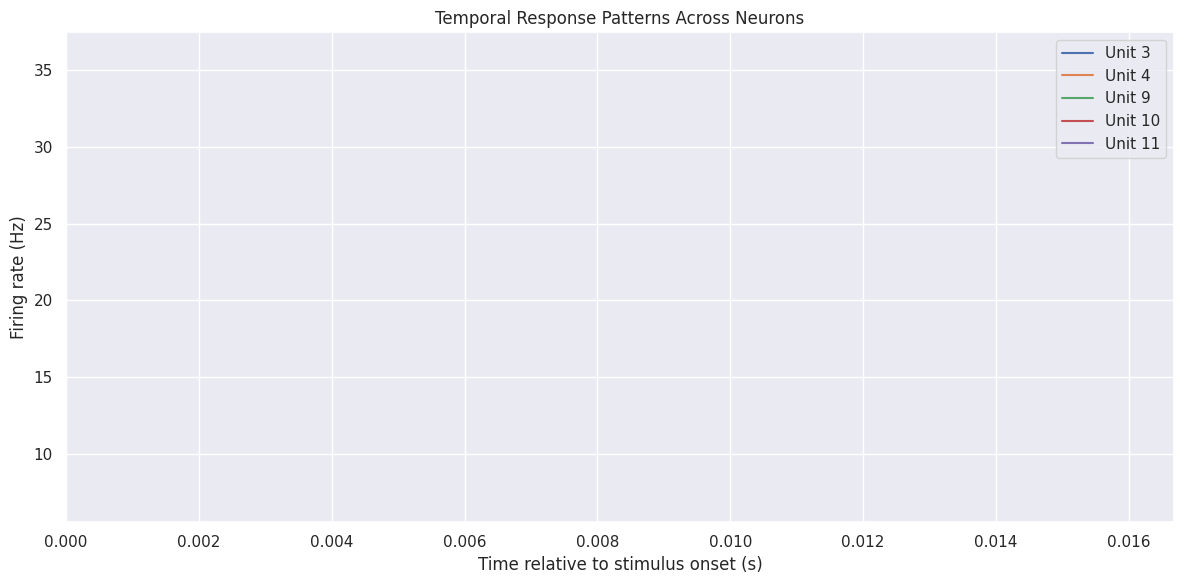

In [20]:
# Plot PSTHs for all responsive units
plt.figure(figsize=(12, 6))

for i, unit_id in enumerate(responsive_units[:5]):
    bin_centers, firing_rate = compute_unit_psth(unit_id, stim_starts, stim_stops, 
                                                bin_size, t_start, t_end)
    plt.plot(bin_centers, firing_rate, label=f'Unit {unit_id}')

plt.xlabel('Time relative to stimulus onset (s)')
plt.ylabel('Firing rate (Hz)')
plt.title('Temporal Response Patterns Across Neurons')
plt.legend()
plt.xlim(0, mean_duration)
plt.tight_layout()
plt.show()

## 7. Visualizing on Neurosift

You can explore this NWB file visually using Neurosift by visiting this link:

[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/96786f67-a6ac-44dc-ba58-61317082fff3/download/&dandisetId=000563&dandisetVersion=0.250311.2145](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/96786f67-a6ac-44dc-ba58-61317082fff3/download/&dandisetId=000563&dandisetVersion=0.250311.2145)

## Summary and Future Directions

In this notebook, we've explored Dandiset 000563, which contains electrophysiology recordings of neurons in the mouse visual cortex responding to white noise visual stimuli. Our analysis focused on the "temporal barcoding" phenomenon, where neurons respond with high temporal precision to repeated white noise stimuli, creating recognizable patterns of activity that resemble barcodes.

Key findings:

1. We were able to visualize these "barcode" patterns by aligning spike times to repeated presentations of the same stimulus.
2. Different neurons show distinct barcode patterns, suggesting that these patterns could serve as "fingerprints" for neuron types.
3. The barcode pattern disappears when each stimulus is unique, confirming that the pattern is indeed due to the temporally precise responses to the specific stimulus features.
4. Correlation analysis showed varying degrees of similarity between the temporal response patterns of different neurons.

Future directions for analysis could include:

1. Clustering neurons based on their barcode patterns to identify potential cell types
2. Comparing barcodes across brain regions to see if similar patterns exist throughout the visual pathway
3. Examining how these barcode patterns relate to other cell properties (e.g., waveform shape, firing rate)
4. Analyzing eye movement and running behavior to understand how these factors affect the barcode patterns
5. Developing generative models that can predict spike timing from stimulus features

This dataset provides a unique opportunity to study the temporal precision of neural coding in the visual system, and how this precision might relate to the functional organization of visual cortical circuits.